In [1]:
from datasets import SimplifiedFHBHandsDataset
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
from PIL import Image
from torch.utils.data import DataLoader

In [2]:
links = [
    (0, 1), (1, 2), (2, 3), (3, 4),     # 大拇指
    (0, 5), (5, 6), (6, 7), (7, 8),     # 食指
    (0, 9), (9, 10), (10, 11), (11, 12), # 中指
    (0, 13), (13, 14), (14, 15), (15, 16), # 无名指
    (0, 17), (17, 18), (18, 19), (19, 20)  # 小拇指
]

def visualize_joints_with_skeleton(image, joints2d, links, joints25d=None):
    fig, ax = plt.subplots(1, figsize=(8, 8))
    
    # 显示图片
    ax.imshow(image)

    # 绘制2D关节点 (红色)
    ax.scatter(joints2d[:, 0], joints2d[:, 1], c='r', label='2D Joints')

    # 绘制关节点之间的连线 (骨架)
    for link in links:
        start, end = link
        ax.plot([joints2d[start, 0], joints2d[end, 0]], 
                [joints2d[start, 1], joints2d[end, 1]], 'r-')

    # 如果有2.5D坐标，也绘制深度信息 (蓝色)
    if joints25d is not None:
        # 将 z 轴深度值映射为颜色 (从浅蓝到深蓝)
        depths = joints25d[:, 2]
        depth_colors = (depths - depths.min()) / (depths.max() - depths.min())  # 归一化
        ax.scatter(joints25d[:, 0], joints25d[:, 1], c=depth_colors, cmap='Blues', label='2.5D Joints')

    # 设置图例
    ax.legend()
    ax.set_title("2D and 2.5D Joints with Skeleton Visualization")
    plt.show()

In [3]:
dataset_root = "/media/mldadmin/home/s123mdg31_07/Datasets/FPHAB"
dataset = SimplifiedFHBHandsDataset(dataset_folder=dataset_root, split='train')
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=8)

# 获取第一个样本
print(len(dataset))
print(len(dataloader))



subj:  17%|█▋        | 1/6 [00:00<00:00,  7.82it/s]/media/mldadmin/home/s123mdg31_07/Projects/simpleHand/datasets/FPHAB.py:124: UserWarning: loadtxt: input contained no data: "/media/mldadmin/home/s123mdg31_07/Datasets/FPHAB/Hand_pose_annotation_v1/Subject_4/flip_sponge/2/skeleton.txt"
  skeleton_vals = np.loadtxt(skeleton_path)
subj:  67%|██████▋   | 4/6 [00:00<00:00,  7.26it/s]/media/mldadmin/home/s123mdg31_07/Projects/simpleHand/datasets/FPHAB.py:124: UserWarning: loadtxt: input contained no data: "/media/mldadmin/home/s123mdg31_07/Datasets/FPHAB/Hand_pose_annotation_v1/Subject_2/close_milk/4/skeleton.txt"
  skeleton_vals = np.loadtxt(skeleton_path)
/media/mldadmin/home/s123mdg31_07/Projects/simpleHand/datasets/FPHAB.py:124: UserWarning: loadtxt: input contained no data: "/media/mldadmin/home/s123mdg31_07/Datasets/FPHAB/Hand_pose_annotation_v1/Subject_2/put_tea_bag/2/skeleton.txt"
  skeleton_vals = np.loadtxt(skeleton_path)
subj: 100%|██████████| 6/6 [00:00<00:00,  7.07it/s]


Train samples: 52324
Test samples: 53135
52324
818


In [4]:
import tqdm
import torch
# iterate the dataset to see if it works
idx = 0
# single batch
for batch in tqdm.tqdm(dataset):
    cam_intr = batch['cam_intr']

    # use numpy to determine if nan exists
    if np.isnan(cam_intr).any():
        print('nan exists')
        break
    

  0%|          | 59/52324 [02:26<97:45:12,  6.73s/it]

In [7]:
joints25d = sample['joints25d']
print(joints25d)

cam_intr = sample['cam_intr']
focal = cam_intr[:1, :1]
num_joints = joints25d.shape[0]
focal = focal.reshape(1, 1)
depth = joints25d[:, 2].reshape(num_joints, 1)
joints2d = joints25d[:, :2] * focal / depth

est_ZO = focal * depth + 

[[179.91620699  20.88848885   0.3332985 ]
 [187.37331     33.71816132   0.32030031]
 [141.73244498 123.72361794   0.34530157]
 [114.80922238 176.81735617   0.36196822]
 [ 93.96686645 217.99266103   0.36578858]
 [ 65.29878121 113.3398188    0.33759737]
 [ 60.25579237 160.07176065   0.37124476]
 [ 57.2085873  188.30936451   0.39503512]
 [ 71.63604217 203.48290964   0.40888062]
 [ 67.12735488  93.19404449   0.3562848 ]
 [ 43.25444416 140.11418772   0.39177743]
 [ 73.40877166 161.30640161   0.41054437]
 [107.13559225 168.29891665   0.41732293]
 [ 76.82250511  72.84311451   0.36964527]
 [ 50.91012679 111.51833769   0.40201476]
 [ 71.31895698 136.25728801   0.42081809]
 [103.99070403 148.82486809   0.42792469]
 [ 81.20315309  58.40145659   0.38231692]
 [ 80.12227736  92.08881421   0.40864244]
 [ 79.51034746 111.16519695   0.42522302]
 [104.60344779 127.99988857   0.43216038]]


In [ ]:
sample = dataset[1001]
img = sample['img'] # 3, 224, 224

# visualiza img
img = np.transpose(img, (1, 2, 0))
import cv2
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

joints2d_normalized = sample['uv'] # 21, 2
joints2d = joints2d_normalized * 224
joints25d = sample['joints25d'] # 21, 3
joints3d = sample['xyz'] # 21, 3

visualize_joints_with_skeleton(img, joints2d, links, joints25d)



In [ ]:
dataset = SimplifiedFHBHandsDataset(dataset_folder=dataset_root, split='test')
print(len(dataset_val))

In [4]:
import torch
import tqdm
dataloader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=False, num_workers=4)

joints25d = []

for idx, sample in tqdm.tqdm(enumerate(dataloader)):
    joints25d.append(sample['joints25d'])
    if idx == 10:
        break

joints25d = torch.cat(joints25d, dim=0)
joints25d = joints25d.numpy()
joints25d = joints25d.reshape(-1, 21, 3)

joints2d = joints25d[:, :, :2]
jointsz = joints25d[:, :, 2]




10it [00:11,  1.19s/it]


In [5]:
joints25d.shape
print(joints25d[0, 0, :])

[ 38.94860905  37.92678062 333.36953735]


In [7]:
# range, distribution of joints 2d and joints z
print(joints2d.min(), joints2d.max())

print("mean of joints2d", joints2d.mean())
print("std of joints2d", joints2d.std())
print("mean of jointsz", jointsz.mean())
print("std of jointsz", jointsz.std())




-3000.4003504292755 4226.324502248255
mean of joints2d 112.81265209855759
std of joints2d 79.5948876752207
mean of jointsz 434.2913642105086
std of jointsz 69.9829696613548


In [4]:
import torch
from torch.utils.data import DataLoader
dataloader = DataLoader(dataset, batch_size=128, shuffle=False, num_workers=4)

sample: 100%|██████████| 206/206 [00:00<00:00, 2167.93it/s]
/media/mldadmin/home/s123mdg31_07/Projects/simpleHand/datasets/FPHAB.py:124: UserWarning: loadtxt: input contained no data: "/media/mldadmin/home/s123mdg31_07/Datasets/FPHAB/Hand_pose_annotation_v1/Subject_4/flip_sponge/2/skeleton.txt"
  skeleton_vals = np.loadtxt(skeleton_path)
subj:  67%|██████▋   | 4/6 [00:00<00:00,  9.58it/s]/media/mldadmin/home/s123mdg31_07/Projects/simpleHand/datasets/FPHAB.py:124: UserWarning: loadtxt: input contained no data: "/media/mldadmin/home/s123mdg31_07/Datasets/FPHAB/Hand_pose_annotation_v1/Subject_2/close_milk/4/skeleton.txt"
  skeleton_vals = np.loadtxt(skeleton_path)
/media/mldadmin/home/s123mdg31_07/Projects/simpleHand/datasets/FPHAB.py:124: UserWarning: loadtxt: input contained no data: "/media/mldadmin/home/s123mdg31_07/Datasets/FPHAB/Hand_pose_annotation_v1/Subject_2/put_tea_bag/2/skeleton.txt"
  skeleton_vals = np.loadtxt(skeleton_path)
subj: 100%|██████████| 6/6 [00:00<00:00,  8.99it/s

Train samples: 52324
Test samples: 53135


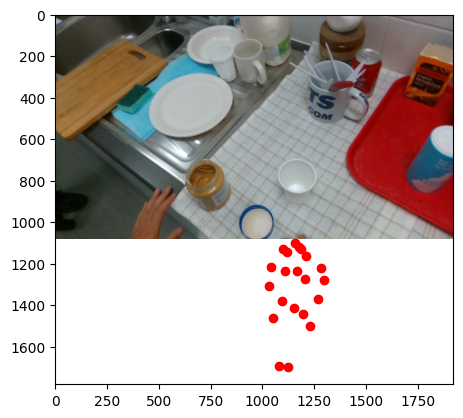

No valid points in sample 44250, the img file is /media/mldadmin/home/s123mdg31_07/Datasets/FPHAB/Video_files/Subject_5/open_peanut_butter/4/color/color_0133.jpeg
coor_valid: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
joints2d: [[1123.6294 1697.0106]
 [1079.7665 1693.56  ]
 [1050.6409 1461.599 ]
 [1031.5497 1309.551 ]
 [1041.2351 1218.4929]
 [1095.5829 1381.6683]
 [1109.593  1233.7296]
 [1118.1199 1143.6877]
 [1098.2695 1129.3705]
 [1151.8878 1413.7748]
 [1166.441  1235.5264]
 [1175.7869 1121.059 ]
 [1157.5115 1099.5941]
 [1193.4524 1442.6046]
 [1203.3564 1275.8588]
 [1210.1156 1162.062 ]
 [1185.8966 1127.2765]
 [1229.9819 1501.8704]
 [1269.1865 1368.8746]
 [1296.2646 1277.0153]
 [1284.21   1223.3195]]
joints3d: [[ 51.25414  315.4213   380.7297  ]
 [ 38.872543 311.14413  376.69104 ]
 [ 34.414623 275.81146  418.02164 ]
 [ 30.920708 248.11841  450.41568 ]
 [ 35.663322 229.12248  471.8087  ]
 [ 47.397312 249.36147  413.85416 ]
 [ 55.590794 221.59792  446.282   ]
 [ 6

<Figure size 640x480 with 0 Axes>

In [1]:
from datasets import SimplifiedFHBHandsDataset
dataset_root = "/media/mldadmin/home/s123mdg31_07/Datasets/FPHAB"
dataset = SimplifiedFHBHandsDataset(dataset_folder=dataset_root, split='train')
item = dataset[44250]

In [12]:
import argparse
import os
import numpy as np
# import trimesh
from matplotlib import pyplot as plt
from PIL import Image


# Loading utilities
# def load_objects(obj_root):
#     object_names = ['juice_bottle', 'liquid_soap', 'milk', 'salt']
#     all_models = {}
#     for obj_name in object_names:
#         obj_path = os.path.join(obj_root, '{}_model'.format(obj_name),
#                                 '{}_model.ply'.format(obj_name))
#         mesh = trimesh.load(obj_path)
#         all_models[obj_name] = {
#             'verts': np.array(mesh.vertices),
#             'faces': np.array(mesh.faces)
#         }
#     return all_models


def get_skeleton(sample, skel_root):
    skeleton_path = os.path.join(skel_root, sample['subject'],
                                 sample['action_name'], sample['seq_idx'],
                                 'skeleton.txt')
    print('Loading skeleton from {}'.format(skeleton_path))
    skeleton_vals = np.loadtxt(skeleton_path)
    skeleton = skeleton_vals[:, 1:].reshape(skeleton_vals.shape[0], 21,
                                            -1)[sample['frame_idx']]
    return skeleton


def get_obj_transform(sample, obj_root):
    seq_path = os.path.join(obj_root, sample['subject'], sample['action_name'],
                            sample['seq_idx'], 'object_pose.txt')
    with open(seq_path, 'r') as seq_f:
        raw_lines = seq_f.readlines()
    raw_line = raw_lines[sample['frame_idx']]
    line = raw_line.strip().split(' ')
    trans_matrix = np.array(line[1:]).astype(np.float32)
    trans_matrix = trans_matrix.reshape(4, 4).transpose()
    print('Loading obj transform from {}'.format(seq_path))
    return trans_matrix


# Display utilities
def visualize_joints_2d(ax, joints, joint_idxs=True, links=None, alpha=1):
    """Draw 2d skeleton on matplotlib axis"""
    if links is None:
        links = [(0, 1, 2, 3, 4), (0, 5, 6, 7, 8), (0, 9, 10, 11, 12),
                 (0, 13, 14, 15, 16), (0, 17, 18, 19, 20)]
    # Scatter hand joints on image
    x = joints[:, 0]
    y = joints[:, 1]
    ax.scatter(x, y, 1, 'r')

    # Add idx labels to joints
    for row_idx, row in enumerate(joints):
        if joint_idxs:
            plt.annotate(str(row_idx), (row[0], row[1]))
    _draw2djoints(ax, joints, links, alpha=alpha)


def _draw2djoints(ax, annots, links, alpha=1):
    """Draw segments, one color per link"""
    colors = ['r', 'm', 'b', 'c', 'g']

    for finger_idx, finger_links in enumerate(links):
        for idx in range(len(finger_links) - 1):
            _draw2dseg(
                ax,
                annots,
                finger_links[idx],
                finger_links[idx + 1],
                c=colors[finger_idx],
                alpha=alpha)


def _draw2dseg(ax, annot, idx1, idx2, c='r', alpha=1):
    """Draw segment of given color"""
    ax.plot(
        [annot[idx1, 0], annot[idx2, 0]], [annot[idx1, 1], annot[idx2, 1]],
        c=c,
        alpha=alpha)


def main():
    reorder_idx = np.array([
        0, 1, 6, 7, 8, 2, 9, 10, 11, 3, 12, 13, 14, 4, 15, 16, 17, 5, 18, 19,
        20
    ])
    args = {}
    args['root'] = "/media/mldadmin/home/s123mdg31_07/Datasets/FPHAB"
    args['subject'] = 'Subject_1'
    args['action_name'] = 'prick'
    args['seq_idx'] = '4'
    args['frame_idx'] = 19
    args['obj'] = None
    obj_root = "/media/mldadmin/home/s123mdg31_07/Datasets/FPHAB/Object_models"
    
    sample = {
        'subject': args['subject'],
        'action_name': args['action_name'],
        'seq_idx': args['seq_idx'],
        'frame_idx': args['frame_idx'],
        'object': args['obj']
    }

    print('Loading sample {}'.format(sample))
    cam_extr = np.array(
        [[0.999988496304, -0.00468848412856, 0.000982563360594,
          25.7], [0.00469115935266, 0.999985218048, -0.00273845880292, 1.22],
         [-0.000969709653873, 0.00274303671904, 0.99999576807,
          3.902], [0, 0, 0, 1]])
    cam_intr = np.array([[1395.749023, 0, 935.732544],
                         [0, 1395.749268, 540.681030], [0, 0, 1]])
    skeleton_root = os.path.join(args['root'], 'Hand_pose_annotation_v1')
    obj_root = os.path.join(args['root'], 'Object_models')
    obj_trans_root = os.path.join(args['root'], 'Object_6D_pose_annotation_v1')
    skel = get_skeleton(sample, skeleton_root)[reorder_idx]
    if args['obj'] is not None:
        # Load object mesh
        object_infos = load_objects(obj_root)

        # Load object transform
        obj_trans = get_obj_transform(sample, obj_trans_root)

        # Get object vertices
        verts = object_infos[sample['object']]['verts'] * 1000

        # Apply transform to object
        hom_verts = np.concatenate(
            [verts, np.ones([verts.shape[0], 1])], axis=1)
        verts_trans = obj_trans.dot(hom_verts.T).T

        # Apply camera extrinsic to objec
        verts_camcoords = cam_extr.dot(
            verts_trans.transpose()).transpose()[:, :3]
        # Project and object skeleton using camera intrinsics
        verts_hom2d = np.array(cam_intr).dot(
            verts_camcoords.transpose()).transpose()
        verts_proj = (verts_hom2d / verts_hom2d[:, 2:])[:, :2]

    # Apply camera extrinsic to hand skeleton
    skel_hom = np.concatenate([skel, np.ones([skel.shape[0], 1])], 1)
    skel_camcoords = cam_extr.dot(
        skel_hom.transpose()).transpose()[:, :3].astype(np.float32)

    skel_hom2d = np.array(cam_intr).dot(skel_camcoords.transpose()).transpose()
    skel_proj = (skel_hom2d / skel_hom2d[:, 2:])[:, :2]

    # Plot everything
    fig = plt.figure()
    # Load image and display
    # ax = fig.add_subplot(221)
    ax = fig.add_subplot(1, 1, 1)
    img_path = os.path.join(args['root'], 'Video_files', sample['subject'],
                            sample['action_name'], sample['seq_idx'], 'color',
                            'color_{:04d}.jpeg'.format(sample['frame_idx']))
    print('Loading image from {}'.format(img_path))
    img = Image.open(img_path)
    ax.imshow(img)
    visualize_joints_2d(ax, skel_proj, joint_idxs=False)
    # if args['obj'] is not None:
    #     ax.scatter(verts_proj[:, 0], verts_proj[:, 1], alpha=0.01, c='r')
    # for proj_idx, (proj_1, proj_2) in enumerate([[0, 1], [1, 2], [0, 2]]):
    #     ax = fig.add_subplot(2, 2, 2 + proj_idx)
    #     if proj_idx == 0:
    #         # Invert y axes to align with image in camera projection
    #         ax.invert_yaxis()
    #     ax.set_aspect('equal')
    #     if args['obj'] is not None:
    #         ax.scatter(
    #             verts_camcoords[:, proj_1], verts_camcoords[:, proj_2], s=1)
    #     visualize_joints_2d(
    #         ax,
    #         np.stack(
    #             [skel_camcoords[:, proj_1], skel_camcoords[:, proj_2]],
    #             axis=1),
    #         joint_idxs=False)
    plt.show()


In [ ]:
main()